<a href="https://colab.research.google.com/github/Zeaxanthin80/CAI2840C/blob/main/Assignments/CV_Week3_and_DeepSeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 (Week 3)

In [ ]:
# !pip install git+https://github.com/deepseek-ai/janus.git -qqq # Install the correct 'janus' package from GitHub.
# !pip install transformers -qqq

In [ ]:
# import os
# import PIL.Image
# import torch
# import numpy as np
# from transformers import AutoModelForCausalLM
# from janus.models import MultiModalityCausalLM, VLChatProcessor

# # specify the path to the model
# model_path = "deepseek-ai/Janus-Pro-7B"
# vl_chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
# tokenizer = vl_chat_processor.tokenizer

# vl_gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
#     model_path, trust_remote_code=True
# )
# vl_gpt = vl_gpt.to(torch.bfloat16).cuda().eval()

# conversation = [
#     {
#         "role": "<|User|>",
#         "content": "A guy at the beach looking at the waves",
#     },
#     {"role": "<|Assistant|>", "content": ""},
# ]

# sft_format = vl_chat_processor.apply_sft_template_for_multi_turn_prompts(
#     conversations=conversation,
#     sft_format=vl_chat_processor.sft_format,
#     system_prompt="",
# )
# prompt = sft_format + vl_chat_processor.image_start_tag

# @torch.inference_mode()
# def generate(
#     mmgpt: MultiModalityCausalLM,
#     vl_chat_processor: VLChatProcessor,
#     prompt: str,
#     temperature: float = 1,
#     parallel_size: int = 16,
#     cfg_weight: float = 5,
#     image_token_num_per_image: int = 576,
#     img_size: int = 384,
#     patch_size: int = 16,
# ):
#     input_ids = vl_chat_processor.tokenizer.encode(prompt)
#     input_ids = torch.LongTensor(input_ids)

#     tokens = torch.zeros((parallel_size*2, len(input_ids)), dtype=torch.int).cuda()
#     for i in range(parallel_size*2):
#         tokens[i, :] = input_ids
#         if i % 2 != 0:
#             tokens[i, 1:-1] = vl_chat_processor.pad_id

#     inputs_embeds = mmgpt.language_model.get_input_embeddings()(tokens)

#     generated_tokens = torch.zeros((parallel_size, image_token_num_per_image), dtype=torch.int).cuda()

#     for i in range(image_token_num_per_image):
#         outputs = mmgpt.language_model.model(inputs_embeds=inputs_embeds, use_cache=True, past_key_values=outputs.past_key_values if i != 0 else None)
#         hidden_states = outputs.last_hidden_state

#         logits = mmgpt.gen_head(hidden_states[:, -1, :])
#         logit_cond = logits[0::2, :]
#         logit_uncond = logits[1::2, :]

#         logits = logit_uncond + cfg_weight * (logit_cond-logit_uncond)
#         probs = torch.softmax(logits / temperature, dim=-1)

#         next_token = torch.multinomial(probs, num_samples=1)
#         generated_tokens[:, i] = next_token.squeeze(dim=-1)

#         next_token = torch.cat([next_token.unsqueeze(dim=1), next_token.unsqueeze(dim=1)], dim=1).view(-1)
#         img_embeds = mmgpt.prepare_gen_img_embeds(next_token)
#         inputs_embeds = img_embeds.unsqueeze(dim=1)

#     dec = mmgpt.gen_vision_model.decode_code(generated_tokens.to(dtype=torch.int), shape=[parallel_size, 8, img_size//patch_size, img_size//patch_size])
#     dec = dec.to(torch.float32).cpu().numpy().transpose(0, 2, 3, 1)

#     dec = np.clip((dec + 1) / 2 * 255, 0, 255)

#     visual_img = np.zeros((parallel_size, img_size, img_size, 3), dtype=np.uint8)
#     visual_img[:, :, :] = dec

#     os.makedirs('generated_samples', exist_ok=True)
#     for i in range(parallel_size):
#         save_path = os.path.join('generated_samples', "img_{}.jpg".format(i))
#         PIL.Image.fromarray(visual_img[i]).save(save_path)

# generate(
#     vl_gpt,
#     vl_chat_processor,
#     prompt,
# )

In [ ]:
!git clone https://github.com/fenago/cv2

Cloning into 'cv2'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 117 (delta 11), reused 0 (delta 0), pack-reused 45 (from 1)
Receiving objects: 100% (117/117), 36.72 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

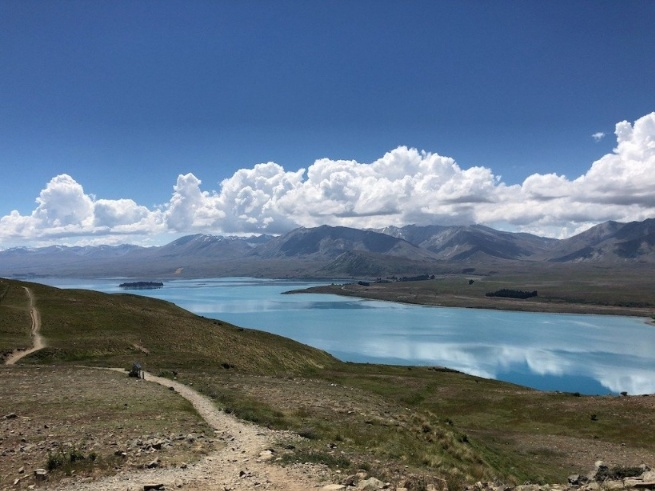

In [ ]:
image = '/content/cv2/Mod2/new-zealand-lake.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image.
Image(filename=image, width='400')

# 1. Addition / Subtraction:  Changes the Image Brightness
Adding a constant value to the intensity of each pixel in an image will increase the brightness of the image. Likewise, subtracting a constant value from each pixel will decrease the brighhtness of an image. We can use the **`add()`** and **`subtract()`** functions in OpenCV to perform these operations on images.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.add(src1, src2[, dst[, mask[, dtype]]])

```
`dst`: Output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array of same size and the same type as src1, or a scalar.

The function has **2 optional arguments**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)
[**`subtract()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

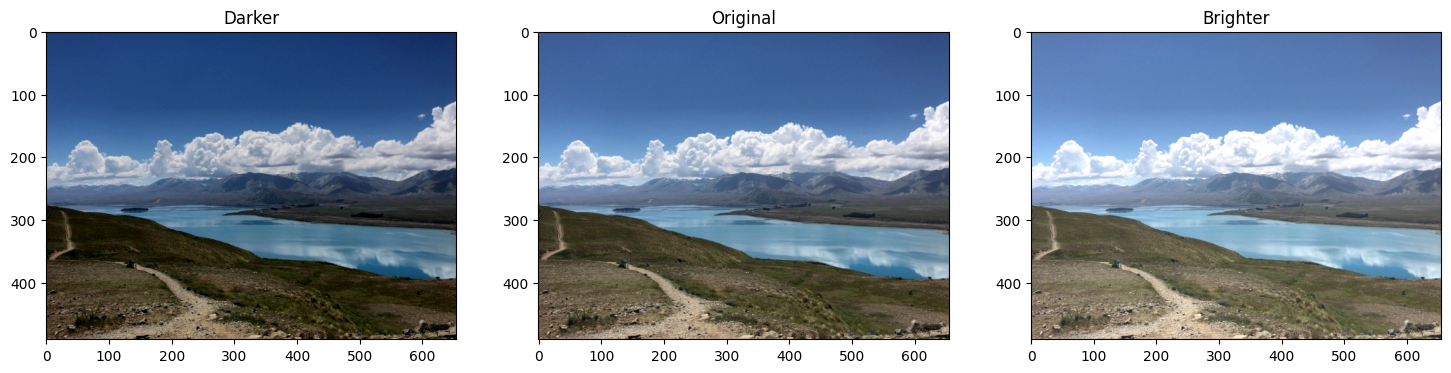

In [ ]:
# Create a matrix with constant intensity.
matrix = np.ones(img.shape, dtype = 'uint8') * 30

# Create brighter and darker images.
img_brighter = cv2.add(img, matrix)
img_darker   = cv2.subtract(img, matrix)

# Display the images
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]);   plt.title('Darker')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);          plt.title('Original')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter');

# 2. Multiplication: Changes the Image Contrast
Multiplying the intensity values of an image by a constant value (greater or less than 1) will change the contrast of the image. Contrast is defined by the difference in the intensity values within an image. Consider the blue lake and the darker foreground in the image. Let's say the intensity of the lake is 150 and that of the foreground is 100. We perceive the difference between these two values as a measure of the contrast in the image. In this case, the difference is 50. Multiplying each by a factor of 1.5 would result in 225 for the lake and 150 for the foreground. The resulting difference after this multiplication is now 75 which has a higher contrast compared to the original image. Multiplying by a factor less than one results in a lower contrast image.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.multiply(src1, src2[, dst[, scale[, dtype]]])
```
`dst`: Output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array.
2. `src2`: second input array of the same size and the same type as src1, or a scalar.

The function has **2 optional arguments**:
1. `scale`: optional scale factor.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`multiply()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

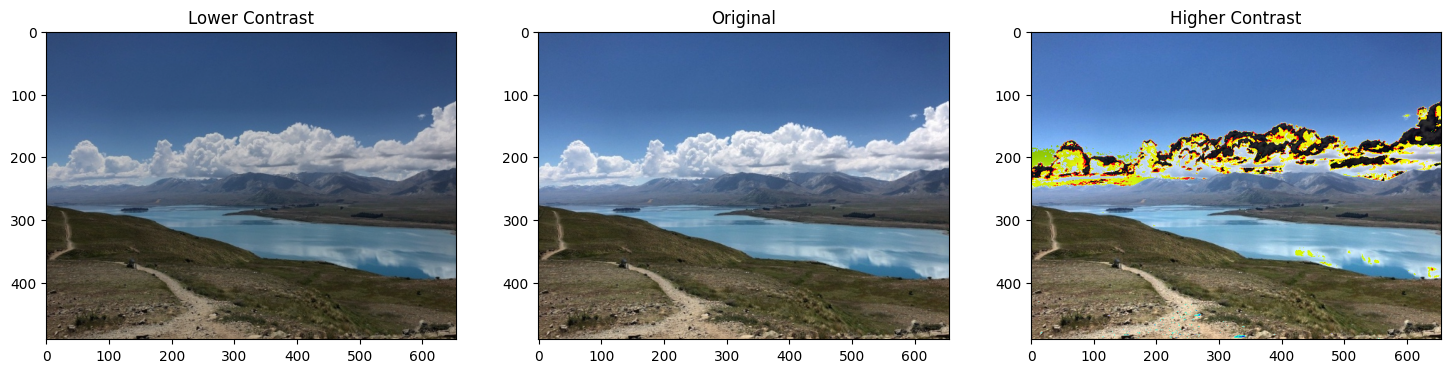

In [ ]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8  # decrease the contrast
matrix2 = np.ones(img.shape) * 1.2  # increase the contrast

# Create lower and higher contrast images.
img_lower  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

### <font style="color:rgb(50,120,230)">What happened?</font>
Notice that the high contrast image above has some strange colors in the clouds. When the original image was multiplied by the scale factor, some pixel intensity values exceeded 255. So when those floating-point values were converted to 8-bit unsigned integers using `np.uint8()`, an overflow condition occurred and the conversion to `uint8` wraps the values back to 0. For example, `np.uint8(265.2)` converts the floating point value of 265.2 to 9. You can verify this with the following command: `print(np.uint8(265.2))`

So, how can we overcome this?

### <font style="color:rgb(50,120,230)">Handling Overflow using np.clip()</font>
The overflow condition can be handled by using the **`np.clip()`** function to clip the multiplied values to a specified range prior to converting to **`uint8`**.

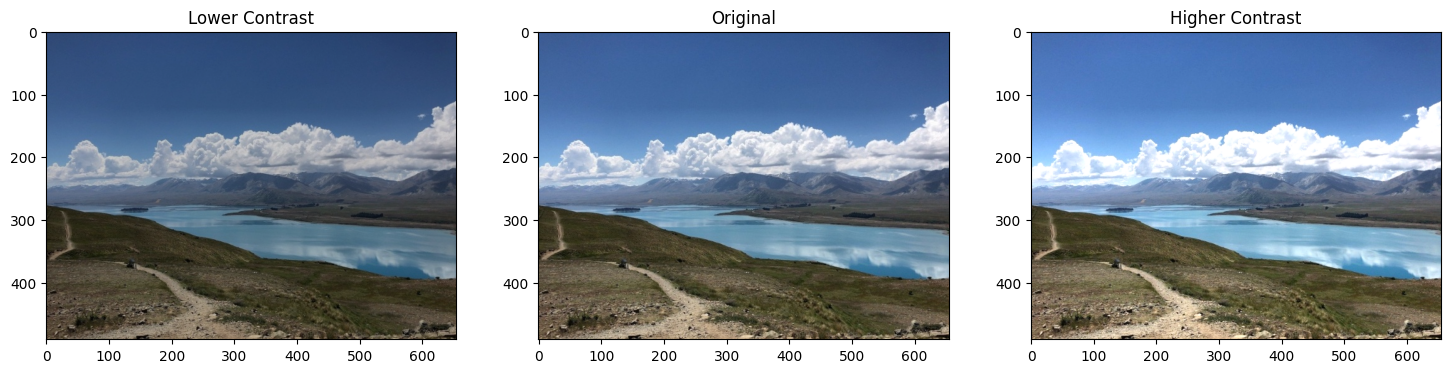

In [ ]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2) , 0, 255))

# Display the images.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

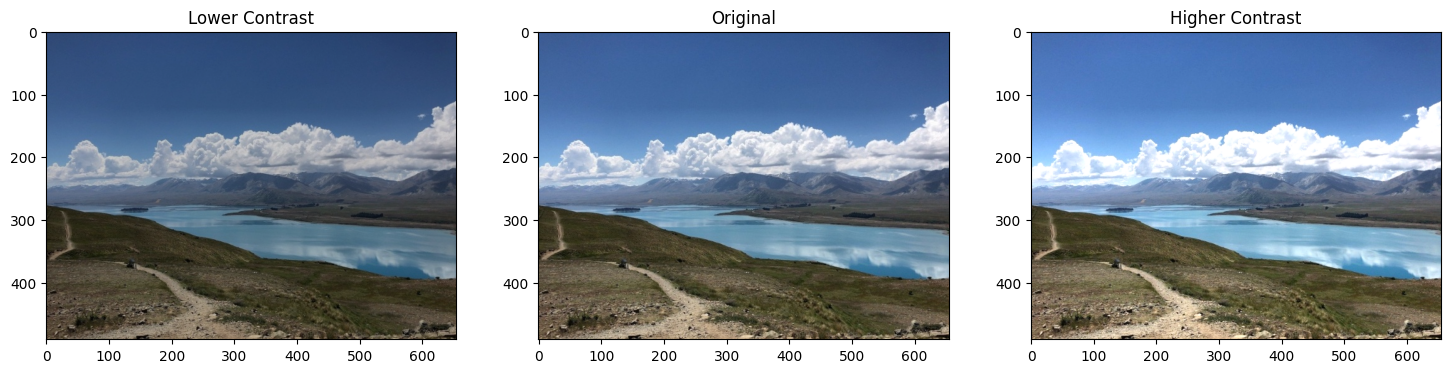

In [ ]:
# Create matrices with a constant scale factor.
matrix_ones = np.ones(img.shape, dtype = 'float64')

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale = 0.8))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale = 1.2) , 0, 255))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

# Exercise

In [ ]:
# Read the image ('Santorini.jpg')
image = '/content/cv2/Mod2/Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Create a matrix of ones (with data type float64)
# matrix_ones =

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
# YOUR CODE HERE
# img_higher1  =
# img_higher2  =

# Display the images (original, higher (1.1x) , high (1.2x))
# UNCOMMENT the lines below.
# plt.figure(figsize=[18,5])
# plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
# plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
# plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)');

# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
# YOUR CODE HERE
# img_higher1  =
# img_higher2  =

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
# UNCOMMENT the lines below.
# plt.figure(figsize = [18,5])
# plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
# plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
# plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped');

# Thresholding

<h1 style="font-size:30px;">Thresholding</h1>

One of the most important and fundamental operations in computer visions pipelines is image thresholding. It is often used to create binary images that can then be used for follow-on processing tasks. In this notebook you will learn how to use two types of thresholding techniques.

* Global thresholding
* Adaptive thresholding

![Thresholding](https://opencv.org/wp-content/uploads/2021/08/c0-m2-feature-image-02.png)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# 1. Global Thresholding
<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Binary images are used extensively in computer vision applications, as they allow you to selectively process specific regions of an image, keeping the other regions intact. Image thresholding is used to create binary images from grayscale images. You can use different thresholds to create different binary images from the same original image using the **`threshold()`** function.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).
2. `thresh`: threshold value.
3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
4. `type`: thresholding type (see ThresholdTypes).


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />



Text(0.5, 1.0, 'Thresholded')

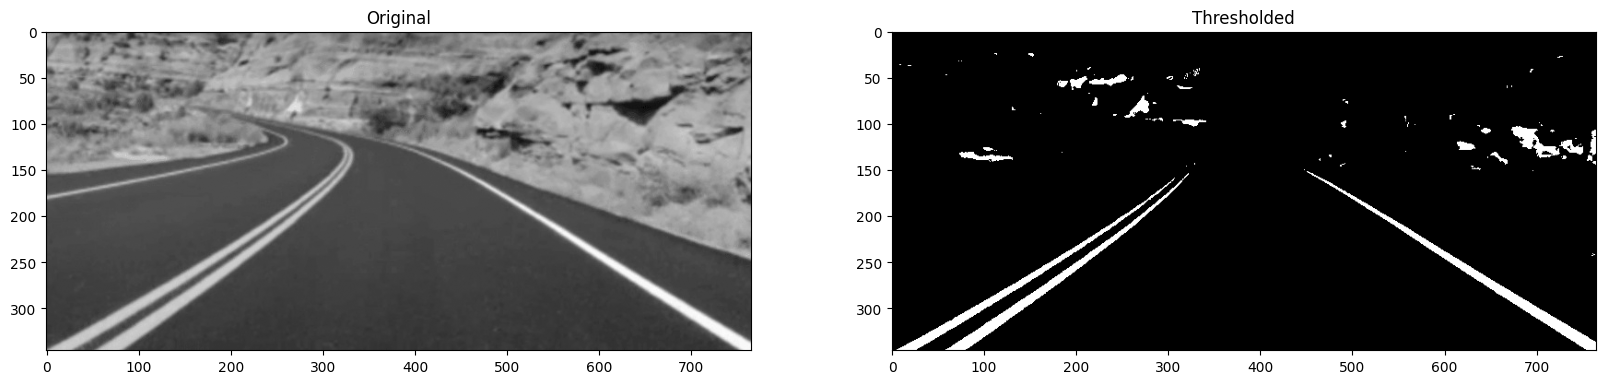

In [ ]:
# Read image in grayscale.
img = cv2.imread('/content/cv2/Mod2/road_lanes.png', cv2.IMREAD_GRAYSCALE)

# Perform binary thresholding.
retval, img_thresh = cv2.threshold(img, 165, 255, cv2.THRESH_BINARY)

# Display the images.
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(img); plt.title('Original')
plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded')

# 2. Adaptive Thresholding
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to
Optical Character Recognition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding
techniques. Let's take a look at an example.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>

``` python
dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied
3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`adaptiveThreshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Thresholded (adaptive)')

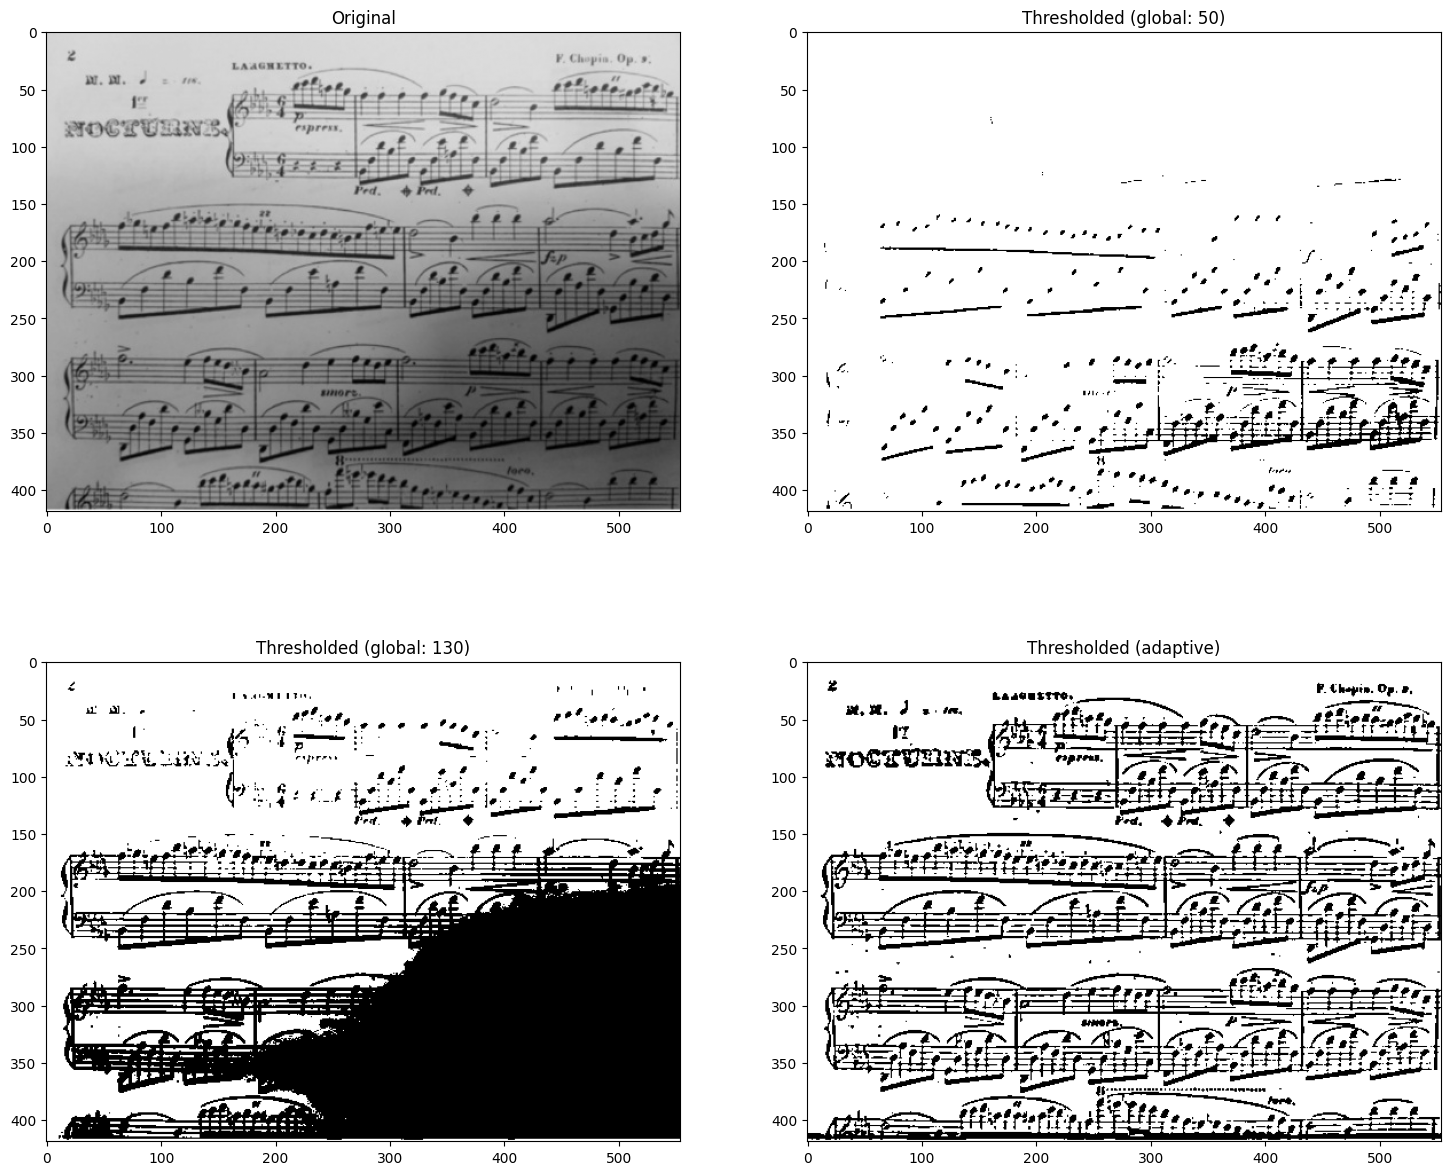

In [ ]:
# Read the original image.
img = cv2.imread('/content/cv2/Mod2/Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding.
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Display the images.
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Thresholded (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Thresholded (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Thresholded (adaptive)')

# Exercise

In [ ]:
img = cv2.imread('/content/cv2/Mod2/Sheet_Music_Test-1.jpg', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding (find the best global threshold that isolates the music from the shadows).
# Use a threshold type of: cv2.THRESH_BINARY_INV
# YOUR CODE HERE
# retval, img_thresh =

# Display the images.
# UNCOMMENT the lines below.
# plt.figure(figsize = [18,15])
# plt.subplot(121); plt.imshow(img);        plt.title('Original')
# plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded (global)')

# Logical Operations

*   And
*   Or

<h1 style="font-size:30px;">Logical Operations</h1>

Logical operations are often used with binary masks to process selective portions of an image. In this notebook we will cover:

* Introduction to logical operators
* Bitwise operations on images: AND, NOT, OR, XOR
* Logo manipulation example

# 1. Introduction to Logical  Operations

The following table summarizes the four logical operators that will be covered in this notebook. The output of each operator for input combinations `A` and `B` are also shown. The values for `A` and `B` are either `0` or `1` because these logical operators will be performed on the bits that are used to represent pixel intensities.

![Binary-Operators](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-operator-table.png)

### <font style="color:rgb(50,120,230)">Binary Notation</font>
The following examples show how the intensity of 255 (white), 42 (dark gray), and 0 (black) are represented as binary numbers:  `11111111`, `00101010`, and `00000000`, respectively. These are 8-bit unsigned integer representations and we will be using this notation when working with logical operators. As you can see, 255 is the largest number that can be represented with an 8-bit unsigned integer.

![Binary-notations](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-notation.png)

### <font style="color:rgb(50,120,230)">Binary Operation Examples</font>
Here are four examples of how the logical `AND` and `OR` operators are applied to unsigned 8-bit integers. In these examples, we are exploring the logical operations on pixel intensities of 0, 42, and 255 (i.e., black, dark gray, and white).
![And-OR](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-and-or-tables-4.png)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# 2. Bitwise Operations on Images

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>

Example API for **`bitwise_and()`**. Others include: **`bitwise_not()`**, **`bitwise_or()`**, **`bitwise_xor()`**

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.
2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font color="green">OpenCV Documentation</font>

[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)
[**`bitwise_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)
[**`bitwise_or()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)
[**`bitwise_xor()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)

[**Arithmetic Operations Tutorial**](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

(200, 499)


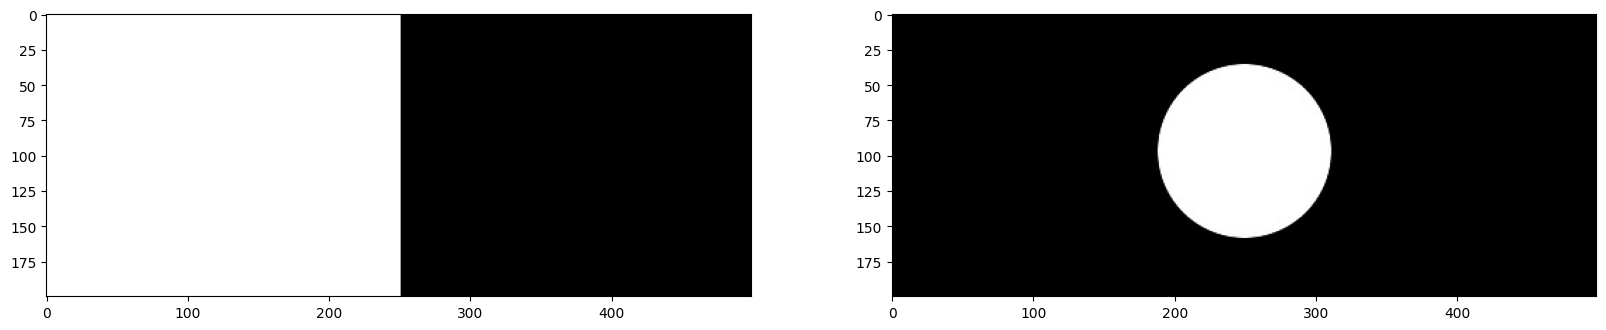

In [ ]:
img_rec = cv2.imread('/content/cv2/Mod2/rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('/content/cv2/Mod2/circle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = [20,5])
plt.subplot(121);  plt.imshow(img_rec);
plt.subplot(122);  plt.imshow(img_cir);
print(img_rec.shape)

### <font style="color:rgb(50,120,230)">Bitwise AND Operator </font>
The `bitwise_and()` function will return

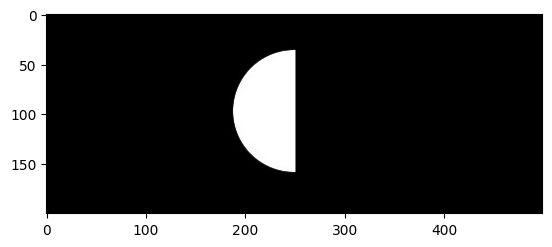

In [ ]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)

plt.imshow(result);

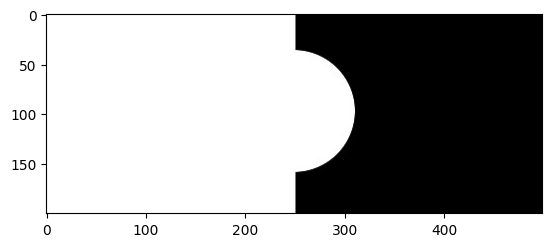

In [ ]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result);

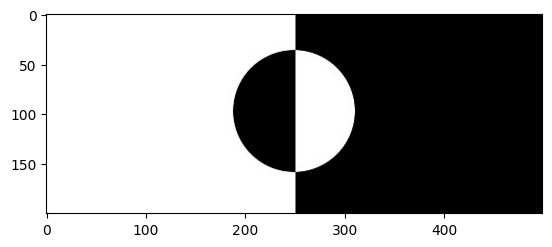

In [ ]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)  # if both binary values are the same:  0.  If both binary values are different: 1
plt.imshow(result);

result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result);

# 2. Example Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Consumer Reports logo below with a background image.

![Logo-manipulation](https://opencv.org/wp-content/uploads/2021/08/c0-m2-logo-manipulation-cr.png)

(500, 500, 3)


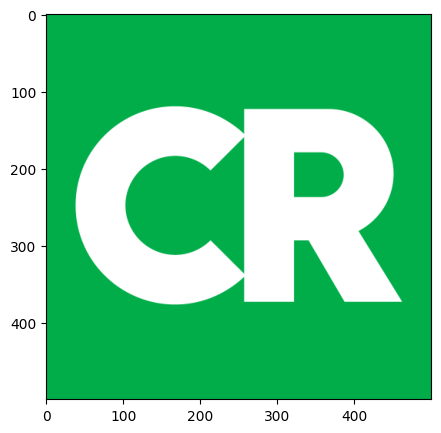

In [ ]:
# Read the of image of color CR logo (foreground).
img_logo = cv2.imread('/content/cv2/Mod2/CR_Logo.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_logo.shape)
logo_h = img_logo.shape[0]
logo_w = img_logo.shape[1]

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo[:, :, ::-1]);

In [ ]:
# Read the of image of color cheackerboad (background).
img_background = cv2.imread('/content/cv2/Mod2/checkerboard_color.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_background.shape);

(900, 900, 3)


(500, 500, 3)


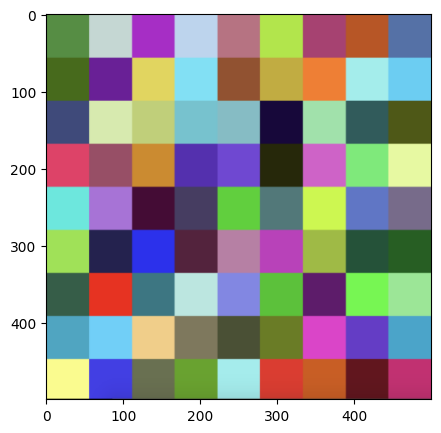

In [ ]:
# Set the dimension of the background image to be the same as the logo.
dim = (logo_w, logo_h)

# Resize the background image to the same size as logo image.
img_background = cv2.resize(img_background, dim, interpolation = cv2.INTER_AREA)

# Print the image shape to confirm it's the same size as the logo.
print(img_background.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background[:, :, ::-1]);

(500, 500)


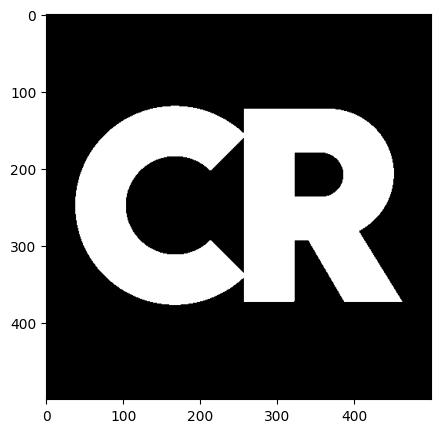

In [ ]:
# Convert the image to grayscale.
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# Apply global thresholding to create a binary mask of the logo.
retval, img_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# Print the image shape.
print(img_logo_mask.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask);

(500, 500, 3)


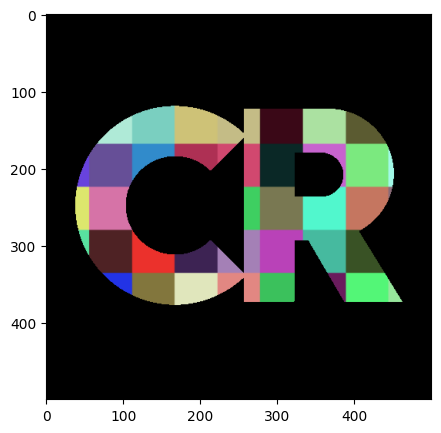

In [ ]:
# Create colorful checkerboard background "behind" the logo lettering.
img_background = cv2.bitwise_and(img_background, img_background, mask = img_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background);

(500, 500)


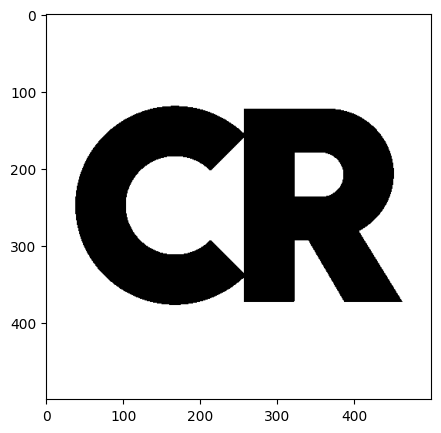

In [ ]:
# Create an inverse mask.
img_logo_mask_inv = cv2.bitwise_not(img_logo_mask)

# Print the image shape.
print(img_logo_mask_inv.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask_inv);

(500, 500, 3)


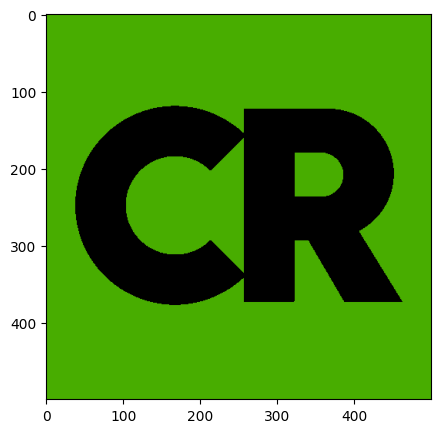

In [ ]:
# Isolate the foreground using the inverse mask.
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask = img_logo_mask_inv)

# Print the image shape.
print(img_foreground.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_foreground);

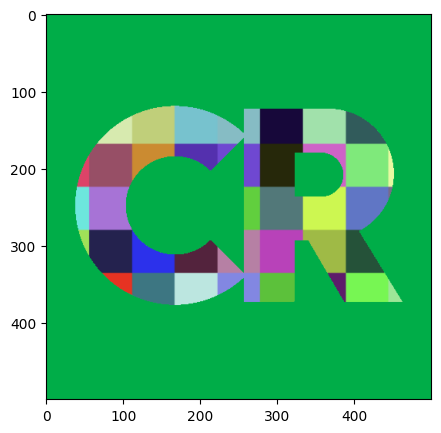

In [ ]:
# Add the two previous results to obtain the final result.
result = cv2.add(img_background,img_foreground)

# Display the image and save the the result to the file system.
plt.figure(figsize = [5, 5])
plt.imshow(result[:, :, ::-1])
cv2.imwrite('logo_final.png', result);

# Exercise

In [ ]:
# Read the image of a yellow square ('yellow_square.png')
img_yellow_square = cv2.imread('yellow_square.png', cv2.IMREAD_COLOR)

# Read the image of a green/gray circle inside square.
img_green_circle = cv2.imread('green_circle.png', cv2.IMREAD_COLOR)

print('yellow square: ', img_yellow_square.shape)
print('gray circle:   ', img_green_circle.shape)

# Display both input images using matplotlib imshow().
plt.figure(figsize = (8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Yellow Square')
plt.subplot(122); plt.imshow(img_green_circle);              plt.title('Green Circle');

### <font style="color:rgb(50,120,230)">Resize the yellow square (completed for you)</font>

Before we can peform logical operations on these images, we need to make them the same size.

In [ ]:
# Resize the background (yellow) image to the same size as the grayscale image.
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# Resize the yellow square.
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)

# Print the image sizes to confirm the width and height match.
print('yellow square: ', img_yellow_square.shape)
print('gray circle: ', img_green_circle.shape)

### <font style="color:rgb(50,120,230)">Coding exercise</font>

Please complete the code in the cells below.

In [ ]:
# Convert the green circle image to grayscale using cvtColor()
# YOUR CODE HERE
# img_gray_circle =

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.
# YOUR CODE HERE
# retval, img_ring_mask =

# Use the bitwise_not() function to create an inverse mask.
# YOUR CODE HERE
# img_ring_mask_inv =

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
# YOUR CODE HERE
# img_combined =

# Display the images.
# UNCOMMENT THE LINES BELOW
# plt.figure(figsize = [20,10])
# plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Gray Scale Image')
# plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mask')
# plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Inverse Mask')
# plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combined');

# Transparancy

<h1 style="font-size:30px;">Alpha Channel</h1>

The alpha channel determines the transparency of a color. It's the fourth channel of an image that has pixel intensities ranging from **0-255**. **0** represents full transparency, **255** represents full opacity and intermediate values provide translucency. Certain file types support an alpha channel and one common file type is the 'PNG' file type. In this notebook, we will look at the alpha channel from an existing `.png` file and learn how to create the alpha mask for images that do not contain an alpha channel.

![Feature-image-02-04](https://opencv.org/wp-content/uploads/2021/08/c0-m2-feature-image-04.png)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

# 1. Inspect the Alpha Channel from a PNG image
In this section we will read a PNG file that contains an alpha channel. We will split the channels and inspect them individually.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />


### <font color="green">OpenCV Documentation</font>

[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

(2436, 2623, 4)


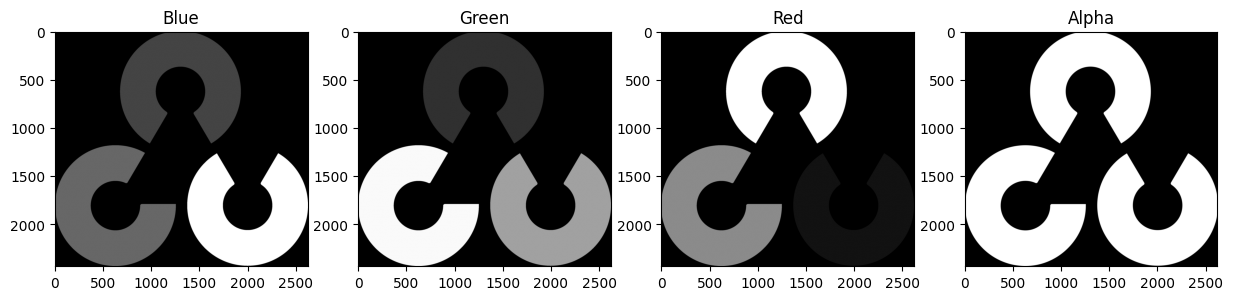

In [ ]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('/content/cv2/Mod2/opencv_logo.png', cv2.IMREAD_UNCHANGED)

print(img.shape)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display eazch of the channels.
plt.figure(figsize = (15,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

# 2. Create a PNG transparent file from a JPG file
The standard JPG file format does not support an alpha channel. Let's see how we can transform a JPG image to include an alpha channel and then save it as a PNG file. This is very useful for creating transparent logos or watermarks.

## 2.1 Read a JPG Image and Convert to Grayscale
In this section, we are going to show you how to add an alpha channel to a JPG image. For instructional purposes, we have added a light green marker to the JPG image to visually demonstrate the difference between a JPG version of the image and the PNG version.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />





### <font color="green">OpenCV Documentation</font>

[**`cvtColor()`**](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Shape of the color image:  (640, 640, 3)


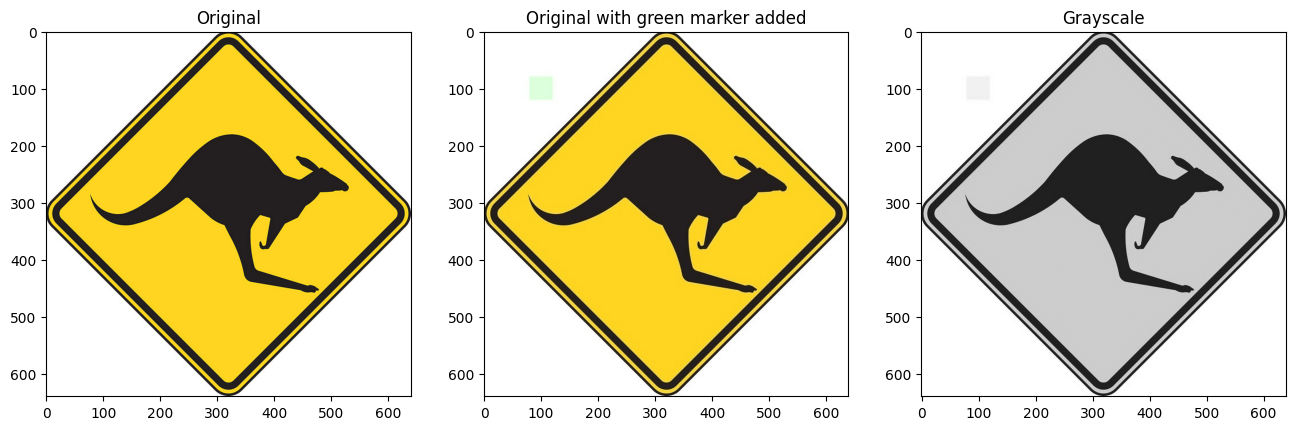

In [ ]:
# Read the original and modified JPG images of the kangaroo sign.
img_kang_org = cv2.imread('/content/cv2/Mod2/kangaroo.jpg',cv2.IMREAD_COLOR)
img_kang = cv2.imread('/content/cv2/Mod2/kangaroo_sign_with_green_marker.jpg',cv2.IMREAD_COLOR)

# For reference: Code used to add light green marker to original image of the kangaroo sign.
# img_kang_org[80:120,80:120,0] = 220
# img_kang_org[80:120,80:120,1] = 255
# img_kang_org[80:120,80:120,2] = 220
# cv2.imwrite('kangaroo_sign_with_green_marker.jpg', img_kang_org)

# Print the image shapes to verify the channels.
print('Shape of the color image: ', img_kang.shape)

# Convert the image to gray scale.
img_kang_gray = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))
plt.subplot(131); plt.imshow(img_kang_org[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(img_kang[:, :, ::-1]);     plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(img_kang_gray);            plt.title('Grayscale');

## 2.2 Create a Binary Mask
The first step in creating an alpha channel is to first create a binary mask for the image. The mask itself becomes the alpha channel. In this case, the white region around the sign is the area we want to be transparent. So we need to create a mask that is black (0) for the region around the sign and white (255) everywhere else.  

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Inverse Mask (full) at (100,100):  0
Inverse Mask (semi) at (100,100):  55


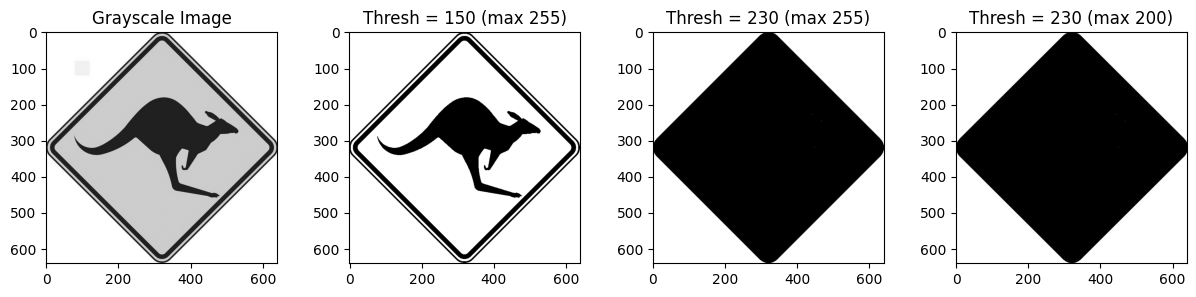

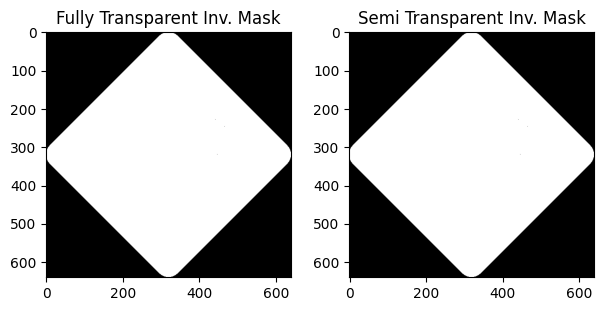

In [ ]:
ret1, thresh1 = cv2.threshold(img_kang_gray, 150, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img_kang_gray, 230, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(img_kang_gray, 230, 200, cv2.THRESH_BINARY)  # Note max value of mask is set to 200

kang_inv_mask_full = cv2.bitwise_not(thresh2)  # Fully transparent
kang_inv_mask_semi = cv2.bitwise_not(thresh3)  # Semi-transparent (due to max value of thresh3 = 200)

# Print the pixel itensity of the inverted binary masks at the location (100,100).
print('Inverse Mask (full) at (100,100): ', kang_inv_mask_full[100,100])
print('Inverse Mask (semi) at (100,100): ', kang_inv_mask_semi[100,100])

plt.figure(figsize = (15, 3))
plt.subplot(141); plt.imshow(img_kang_gray);  plt.title('Grayscale Image')
plt.subplot(142); plt.imshow(thresh1); plt.title('Thresh = 150 (max 255)')
plt.subplot(143); plt.imshow(thresh2); plt.title('Thresh = 230 (max 255)')
plt.subplot(144); plt.imshow(thresh3); plt.title('Thresh = 230 (max 200)')

plt.figure(figsize = (15, 7))
plt.subplot(245); plt.imshow(kang_inv_mask_full); plt.title('Fully Transparent Inv. Mask')
plt.subplot(246); plt.imshow(kang_inv_mask_semi); plt.title('Semi Transparent Inv. Mask');

The fully transparent mask and semi transparent masks above look identical, but this is due to the plotting limitations when using a grayscale color map with matplotlib. The pixel intensity in the black region of the fully transparent mask is equal to zero as expected. However, the pixel intensity of the black region in the semi transparent mask is actually equal to 55, because the thresholded image for this case had a maximum value of 200 and when we created the inverted mask with the `bitwise_not(thresh3)` function, the black region then became 55.

## 2.3 Add the Alpha Channel to the Image

We will now use the **`merge()`** and **`split()`** functions along with the mask to create the alpha channel.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>
[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)
[**`merge()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

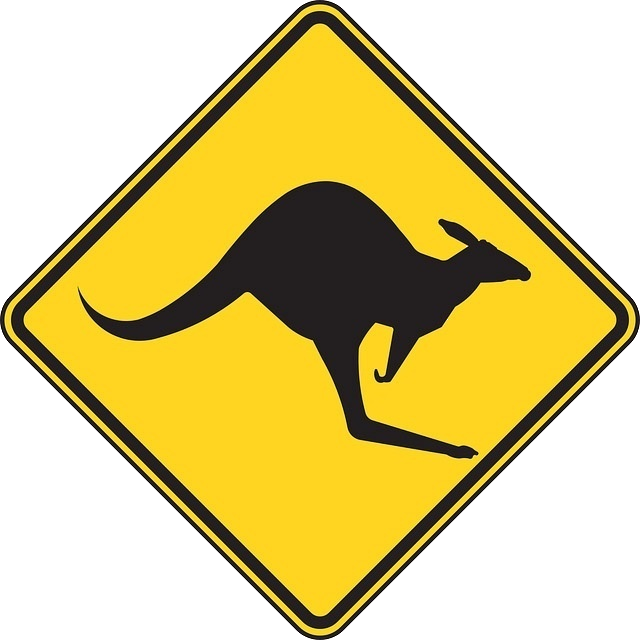

In [ ]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_full]

# Use the merge() function to create a single multi-channel array.
kangaroo_transparent = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_full.png', kangaroo_transparent)

# Display the PNG file we just created.
Image(filename = "kangaroo_alpha_full.png", width = '300')

### <font style="color:rgb(50,120,230)">Transparent Results</font>

Notice that the light green square in the upper left corner of the image is now gone. The alpha channel is masking it, effectively making the image transparent.

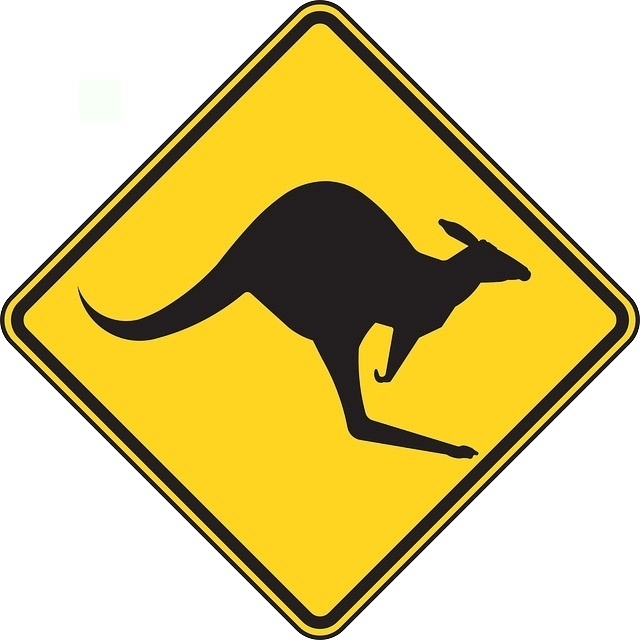

In [ ]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_semi]

# Use the merge() function to create a single multi-channel array.
kangaroo_semi = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_semi.png', kangaroo_semi)

# Display the PNG file we just created.
Image(filename = "/content/cv2/Mod2/kangaroo_alpha_semi.png", width = '300')

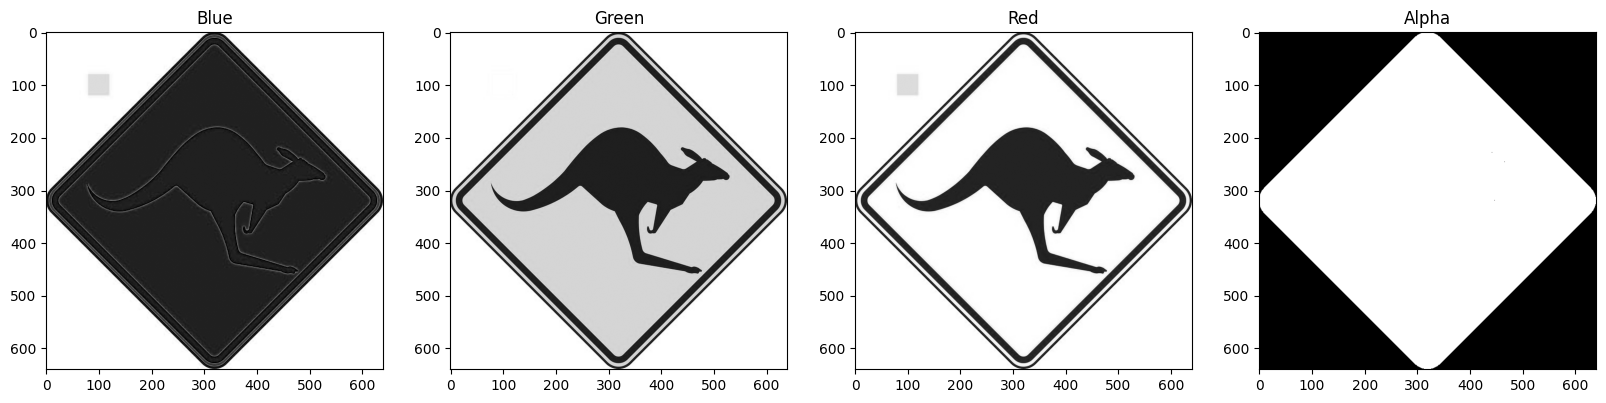

In [ ]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('/content/cv2/Mod2/kangaroo_alpha_full.png', cv2.IMREAD_UNCHANGED)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channels.
plt.figure(figsize = (20,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

Applications of what we covered

In [ ]:
%cd /content/cv2/

/content/cv2


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git pull https://github.com/fenago/cv2

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (9/9), 9.48 MiB | 9.79 MiB/s, done.
From https://github.com/fenago/cv2
 * branch            HEAD       -> FETCH_HEAD
Updating fa2681a..00b9986
Fast-forward
 CV_Week3_and_DeepSeek.ipynb                           | 1767 ++++++++++++++++++++++++++++++++++++-
 Mod2/Applications/02_05_Application_Watermark.ipynb   |    1 +
 Mod2/Applications/02_06_Application_E_Signature.ipynb |    1 +
 3 files changed, 1768 insertions(+), 1 deletion(-)
 create mode 100644 Mod2/Applications/02_05_Application_Watermark.ipynb
 create mode 100644 Mod2/Applications/02_06_Application_E_Signature.ipynb
